In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os
import logging
from pathlib import Path

import pandas as pd
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import seaborn as sns

import numpyro
import numpyro.distributions as dist
from numpyro.distributions.mixtures import MixtureGeneral
from numpyro.infer import MCMC, NUTS
from numpyro.diagnostics import hpdi
from hb_mep.utils import timing, plot
from hb_mep.utils.constants import (
    INTENSITY,
    RESPONSE,
    PARTICIPANT,
    FEATURES
)

numpyro.set_platform("cpu")
numpyro.set_host_device_count(12)
numpyro.enable_x64()

PARENT_PATH = Path(os.getcwd()).parent.absolute()
FORMAT = "%(asctime)s - %(name)s - %(levelname)s - %(message)s"
logging.basicConfig(format=FORMAT, level=logging.INFO)

<Axes: ylabel='Density'>

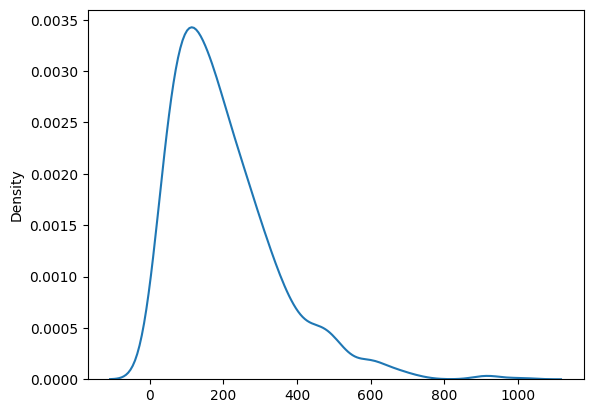

In [7]:
seed = jax.random.PRNGKey(0)

# distribution = dist.TruncatedNormal(150, 50, low=0)
distribution = dist.Gamma(2, .01)


samples = distribution.sample(seed, sample_shape=(1000,))

sns.kdeplot(samples)

In [3]:
import flax
import flax.linen as flax_nn
from numpyro.contrib.module import flax_module
import numpy as np
from jax import nn
import jax.numpy as jnp
import numpyro
import numpyro.distributions as dist
import numpyro.distributions.constraints as constraints

[1, 2, 3]
[1, 2, 3]
[1, 2, 3]
[1, 2, 3]


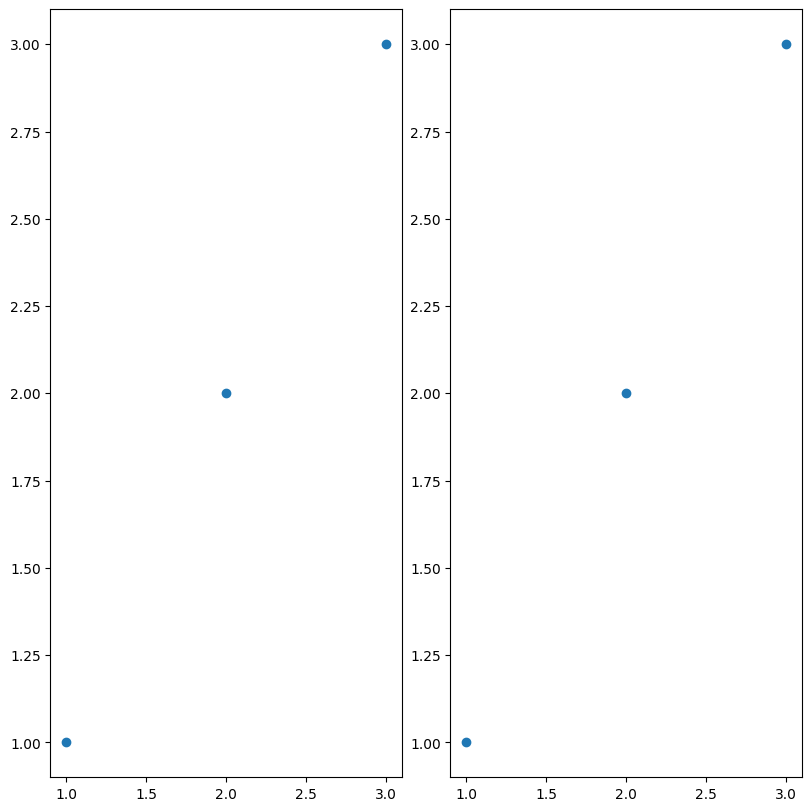

In [9]:
import matplotlib.pyplot as plt
import numpy as np

import multiprocessing

def plot(datax, datay, name, axes):
    x = [1, 2, 3]
    y = [1, 2, 3]
    print(x)
    print(y)
    axes[datax].scatter(x, y, label=name)
    # plt.show()

def multiP():
    fig, axes = plt.subplots(
        figsize=(8, 8),
        nrows=1,
        ncols=2,
        constrained_layout=True
    )

    for i in range(2):
        # p = multiprocessing.Process(target=plot, args=(i, i, i, axes))
        # p.start()
        plot(i, i, i, axes)

    return fig

f = multiP();

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


tags = ["".join(np.random.choice(list("ABCDEFG123"), size=5)) for _ in range(53)]

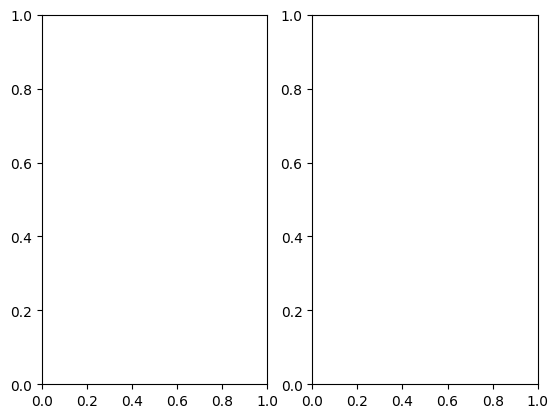

In [1]:
import matplotlib.pyplot as plt

rows = 1
cols = 2
f, ax = plt.subplots(rows, cols, squeeze=False)

In [5]:
import seaborn as sns

sns.lineplot(x=[1,2], y=[3,4], ax=ax[0,0])

<Axes: >

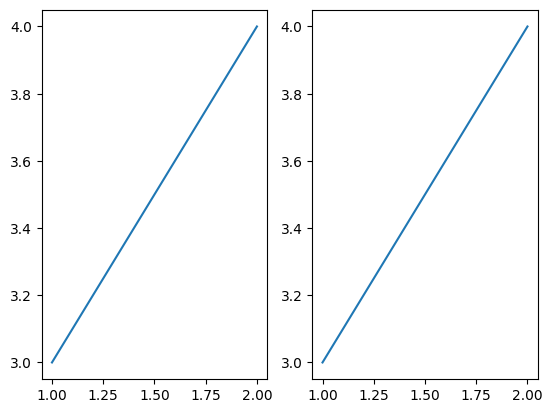

In [6]:
f

In [7]:
ax[0, 1].plot([1,2,3], [2,3,4])
ax[0, 1].display()

AttributeError: 'Axes' object has no attribute 'display'

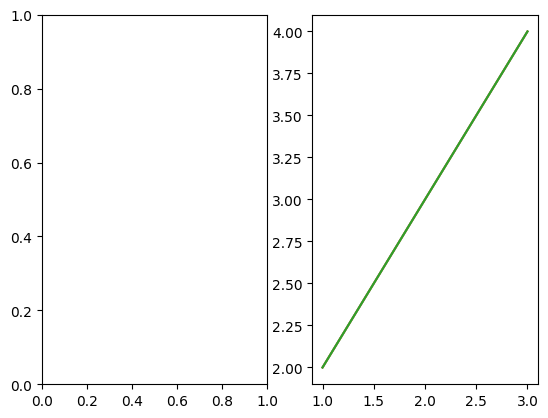

In [9]:
f

In [1]:
data

NameError: name 'data' is not defined

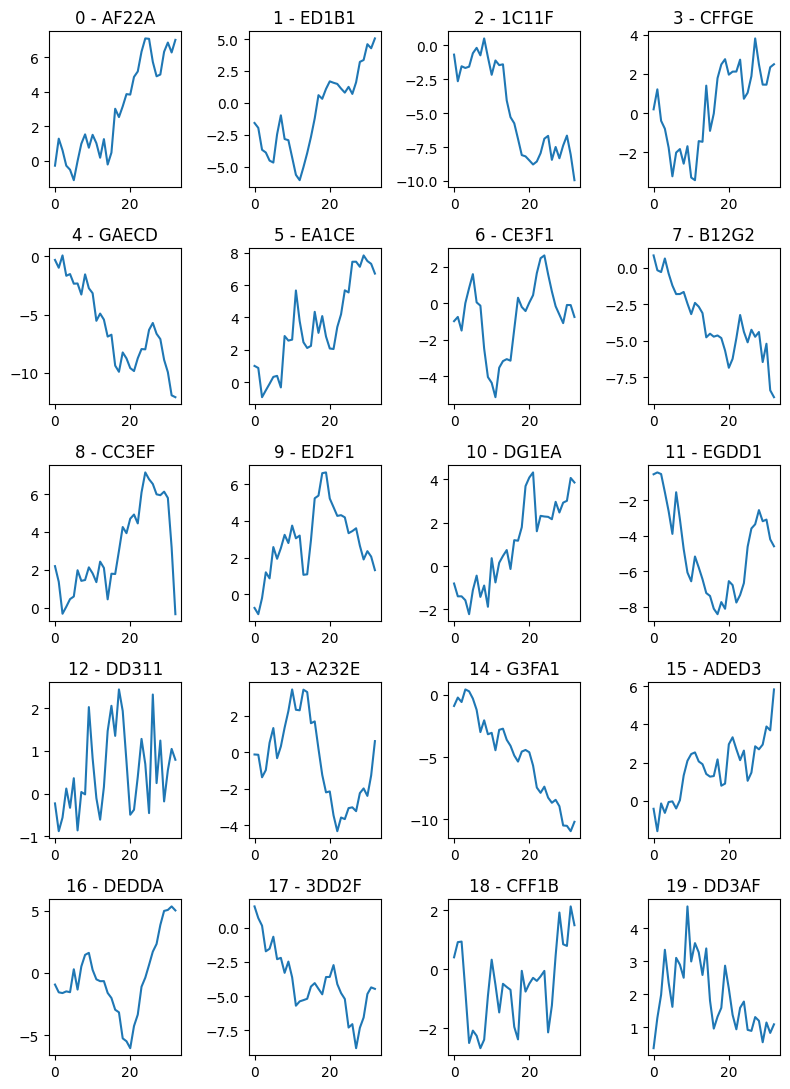

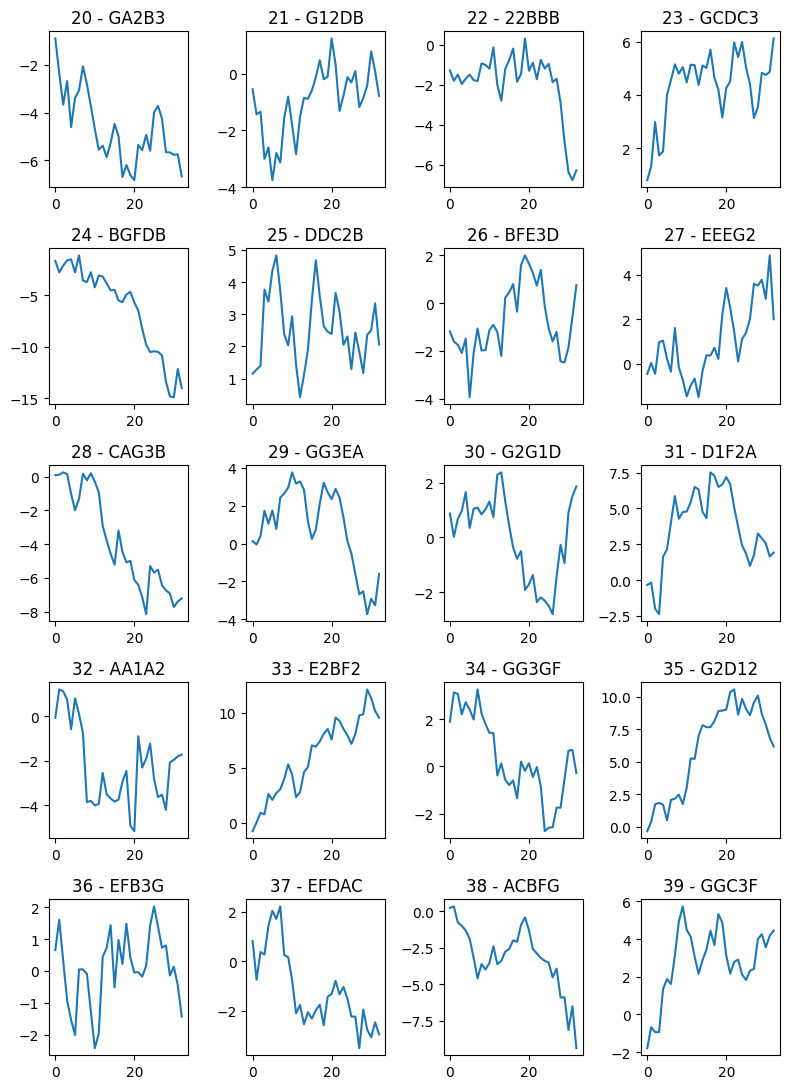

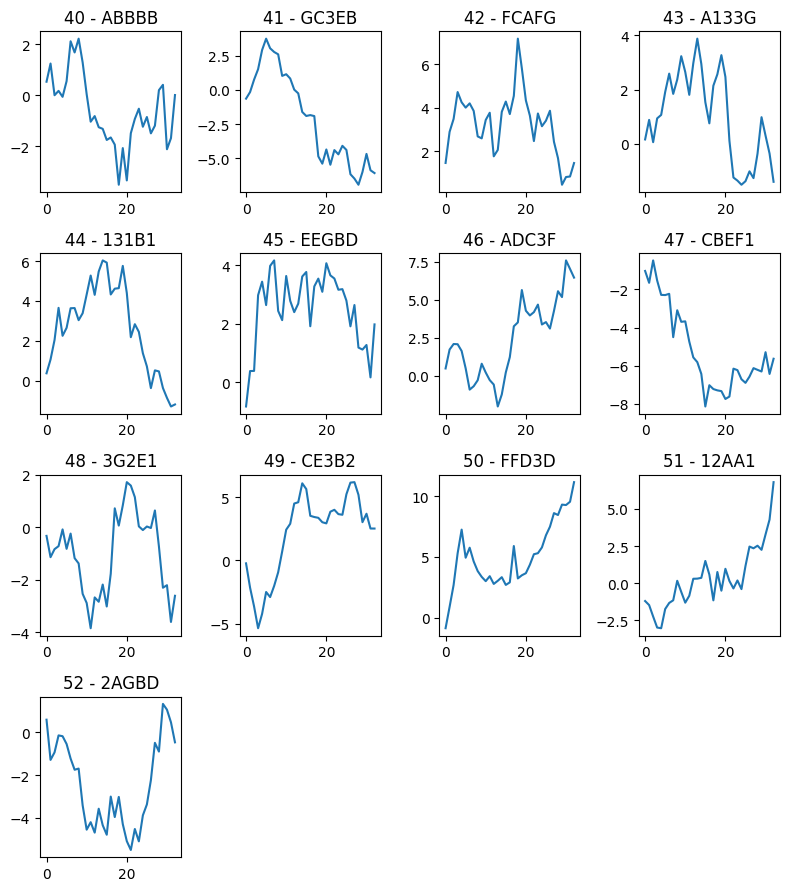

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


tags = ["".join(np.random.choice(list("ABCDEFG123"), size=5)) for _ in range(53)]

N = len(tags)  # number of subplots
nrows = 5      # number of rows per page
ncols = 4      # number of columns per page

# calculate number of pages needed
npages = N // (nrows*ncols)
if N % (nrows*ncols) > 0:
    npages += 1

pdf = PdfPages('out2.pdf')

for page in range(npages):
    fig = plt.figure(figsize=(8,11))
    for i in range(min(nrows*ncols, N-page*(nrows*ncols))):
        # Your plot here
        count = page*ncols*nrows+i
        ax = fig.add_subplot(nrows, ncols, i+1)
        ax.set_title(f"{count} - {tags[count]}")
        ax.plot(np.cumsum(np.random.randn(33)))
        # end of plotting

    fig.tight_layout()
    pdf.savefig(fig)

pdf.close()
plt.show()

In [1]:
from wand.image import Image as WImage

ImportError: MagickWand shared library not found.
You probably had not installed ImageMagick library.
Try to install:
  https://docs.wand-py.org/en/latest/guide/install.html

In [46]:
 - jnp.exp(0.3)

Array(-1.34985881, dtype=float64, weak_type=True)

In [ ]:
-log(g) = 0.3


<Axes: >

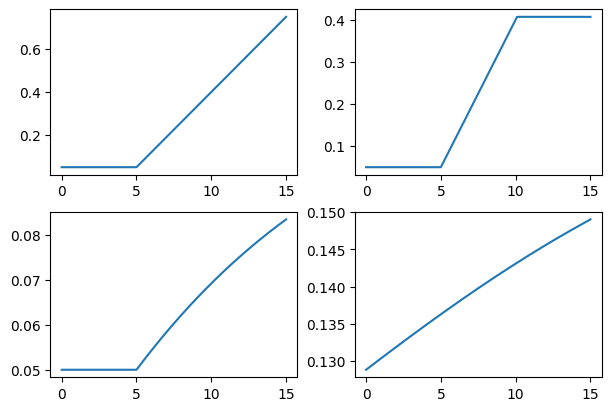

In [61]:
l = lo = .05
b = 0.07
a = 5
h = 0.07
v = 2.1
g = 0.7


intensity = np.linspace(0, 15, 1000)

relu = \
    lo + \
    jax.nn.relu(b * (intensity - a))

satrelu = \
    lo - \
    jnp.log(jnp.maximum(
        g,
        jnp.exp(-jax.nn.relu(
            b * (intensity - a)
        ))
    ))

rec_log = \
    lo + \
    jnp.maximum(
        0,
        -1 + \
        (h + 1) / \
        jnp.power(
            1 + \
            (jnp.power(1 + h, v) - 1) * \
            jnp.exp(-b * (intensity - a)),
            1 / v
        )
    )

gen_log = \
    l + \
    (l + h) / \
    jnp.power(
        1 + jnp.exp(-b * (intensity - a)),
        1 / v
    )


fig, ax = plt.subplots(figsize=(6, 4), nrows=2, ncols=2, constrained_layout=True)
sns.lineplot(x=intensity, y=relu, ax=ax[0, 0])
sns.lineplot(x=intensity, y=satrelu, ax=ax[0, 1])
sns.lineplot(x=intensity, y=rec_log, ax=ax[1, 0])
sns.lineplot(x=intensity, y=gen_log, ax=ax[1, 1])


<Axes: >

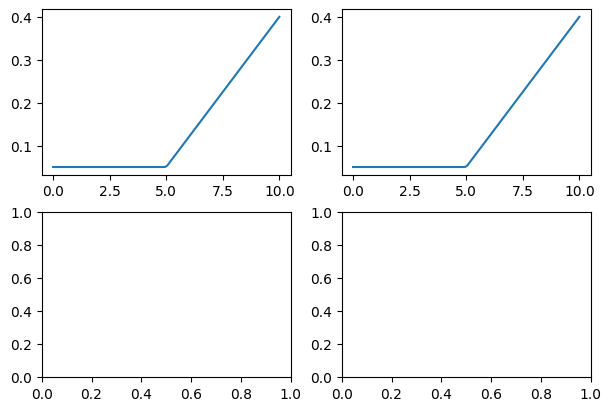

In [4]:
shape = jnp.array([
    [1, 2],
    [3, 4],
    [5, 6]
])

scale = jnp.array([
    [.5, .2],
    [.3, .2],
    [.8, .9]
])

2023-06-19 21:51:38,465 - jax._src.xla_bridge - INFO - Unable to initialize backend 'tpu_driver': NOT_FOUND: Unable to find driver in registry given worker: 
2023-06-19 21:51:38,465 - jax._src.xla_bridge - INFO - Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023-06-19 21:51:38,466 - jax._src.xla_bridge - INFO - Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023-06-19 21:51:38,466 - jax._src.xla_bridge - INFO - Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.
2023-06-19 21:51:38,466 - jax._src.xla_bridge - INFO - Unable to initialize backend 'plugin': xla_extension has no attributes named get_plugin_device_client. Compile TensorFlow with //tensorflow/compiler/xla/python:enable_plugin_device set to true (defaults to false) to enable this.


In [5]:
shape.shape

(3, 2)

<Axes: ylabel='Density'>

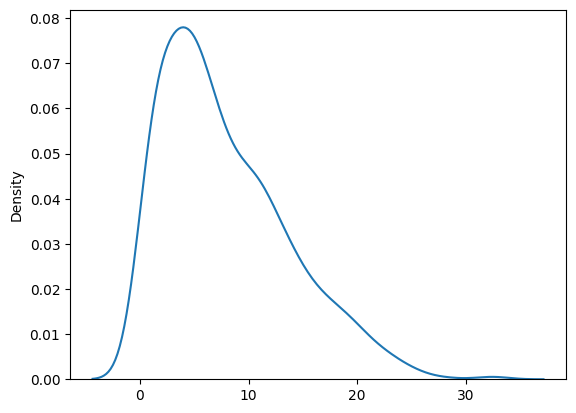

In [6]:
seed = jax.random.PRNGKey(0)

# distribution = dist.Gamma(shape * scale, scale).to_event(1)
distribution = dist.HalfNormal(10)

samples = distribution.sample(seed, sample_shape=(1000,))

sns.kdeplot(samples)

In [9]:
samples.shape

(1000, 3, 2)

<Axes: ylabel='Density'>

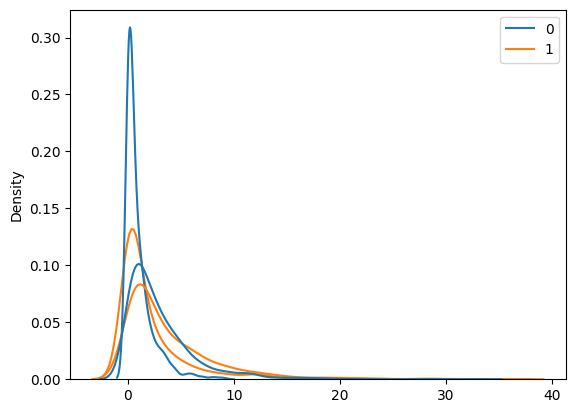

In [12]:
sns.kdeplot(samples[:, 0])
sns.kdeplot(samples[:, 1])

<Axes: ylabel='Density'>

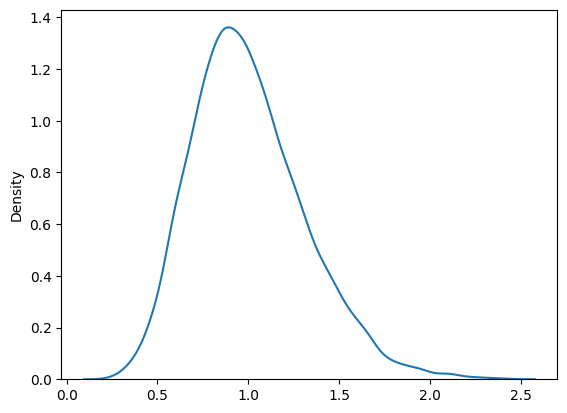

In [10]:
seed = jax.random.PRNGKey(0)

distribution = dist.Gamma(10, 10)

samples = distribution.sample(seed, sample_shape=(10000,))
sns.kdeplot(samples)

In [26]:
print(jnp.array([[1 - a, a], [1 - b, b], [1 - c, c]]))

[[0.9 0.1]
 [0.1 0.9]
 [1.  0. ]]


2023-06-10 20:48:54,734 - matplotlib.legend - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


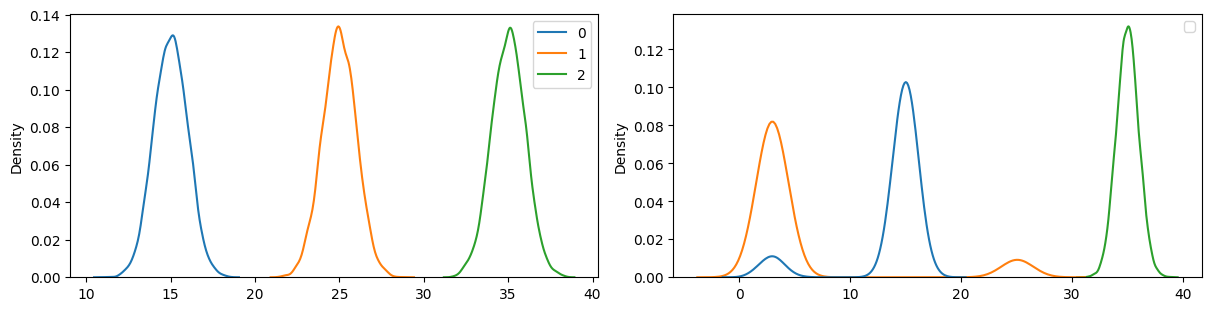

In [27]:
seed = jax.random.PRNGKey(0)

# distribution = dist.Gamma(50, 0.01)
# distribution = dist.StudentT(10000, 10, 2)
# distribution = dist.TruncatedDistribution(dist.StudentT(2.1, 2, 2), low=0)

dist1 = dist.Normal(jnp.array([15, 25, 35]), jnp.array([1, 1, 1]))
# dist2 = dist.Normal(jnp.array([3, 7, 9]), jnp.array([1, 1, 1]))
dist2 = dist.Normal(jnp.array([3]), jnp.array([1]))


a, b, c = (.1, .9, 0)
mixing_distribution = dist.Categorical(probs=jnp.array([[1 - a, a], [1 - b, b], [1 - c, c]]))

component_distributions = [dist1, dist2]

distribution = MixtureGeneral(
    mixing_distribution=mixing_distribution,
    component_distributions=component_distributions
)

samples1 = dist1.sample(seed, sample_shape=(10000,))
samples2 = dist2.sample(seed, sample_shape=(10000,))

samples = distribution.sample(seed, sample_shape=(10000,))

fig, ax = plt.subplots(figsize=(12, 3), nrows=1, ncols=2, constrained_layout=True)
sns.kdeplot(samples1, ax=ax[0])
sns.kdeplot(samples, ax=ax[1])
plt.legend()
# sns.kdeplot(samples1, color="orange")
# sns.kdeplot(samples2, color="red")

2023-06-10 19:21:19,521 - matplotlib.legend - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


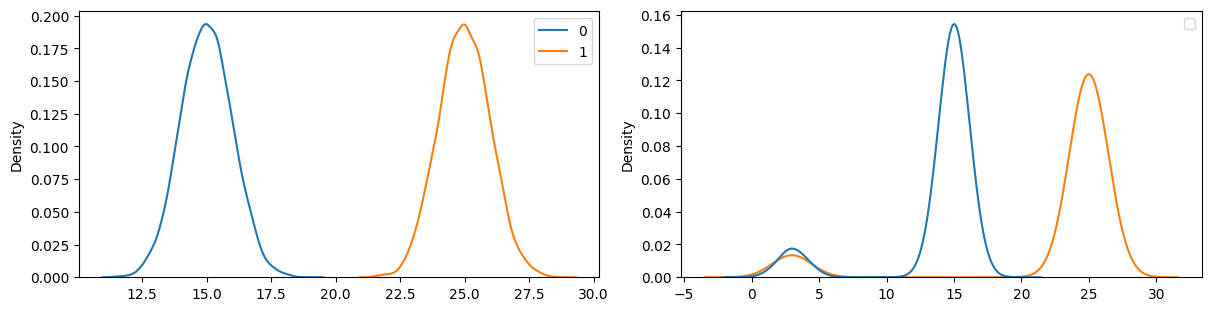

In [17]:
seed = jax.random.PRNGKey(0)

# distribution = dist.Gamma(50, 0.01)
# distribution = dist.StudentT(10000, 10, 2)
# distribution = dist.TruncatedDistribution(dist.StudentT(2.1, 2, 2), low=0)

dist1 = dist
dist2 = dist.Normal(jnp.array([3, 7]), jnp.array([1, 1]))
dist2 = dist.Normal(jnp.array([3]), jnp.array([1]))


a, b = .1, .1
q = .1
mixing_distribution = dist.Categorical(probs=jnp.array([[1 - a, a], [1 - b, b]]))
mixing_distribution = dist.Categorical(probs=jnp.array([1 - q, q]))


component_distributions = [dist1, dist2]

distribution = MixtureGeneral(
    mixing_distribution=mixing_distribution,
    component_distributions=component_distributions
)

samples1 = dist1.sample(seed, sample_shape=(10000,))
samples2 = dist2.sample(seed, sample_shape=(10000,))

samples = distribution.sample(seed, sample_shape=(10000,))

fig, ax = plt.subplots(figsize=(12, 3), nrows=1, ncols=2, constrained_layout=True)
sns.kdeplot(samples1, ax=ax[0])
sns.kdeplot(samples, ax=ax[1])
plt.legend()
# sns.kdeplot(samples1, color="orange")
# sns.kdeplot(samples2, color="red")

<Axes: ylabel='Density'>

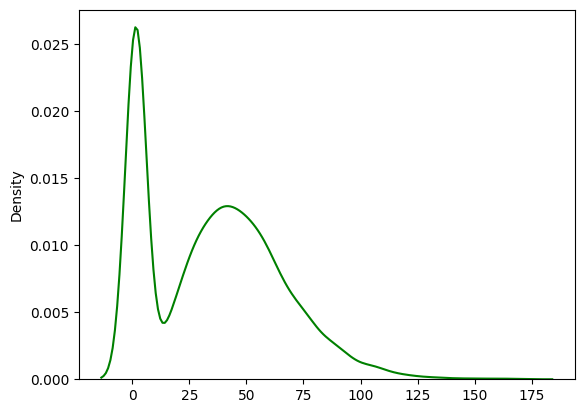

In [14]:
seed = jax.random.PRNGKey(0)

# distribution = dist.Gamma(50, 0.01)
# distribution = dist.StudentT(10000, 10, 2)
# distribution = dist.TruncatedDistribution(dist.StudentT(2.1, 2, 2), low=0)

dist1 = dist.Gamma(8, 5)
dist2 = dist.Gamma(5, .1)

# dist1 = dist.Gamma(2, 0.1)
# dist2 = dist.Gamma(100, 0.1)

q = .3
mixing_distribution = dist.Categorical(probs=jnp.array([q, 1 - q]))

component_distributions = [dist1, dist2]

distribution = MixtureGeneral(
    mixing_distribution=mixing_distribution,
    component_distributions=component_distributions
)

samples = distribution.sample(seed, sample_shape=(10000,))

samples1 = dist1.sample(seed, sample_shape=(10000,))
samples2 = dist2.sample(seed, sample_shape=(10000,))



sns.kdeplot(samples, color="green")
# sns.kdeplot(samples1, color="orange")
# sns.kdeplot(samples2, color="red")


In [25]:
a = 2

print(f"{a:.1f}")

2.0


In [34]:
samples.mean()

Array(39.88060585, dtype=float64)

In [10]:
samples1.mean()

Array(7.96664417, dtype=float64)

In [9]:
samples2.mean()

Array(8.0259386, dtype=float64)

<Axes: ylabel='Density'>

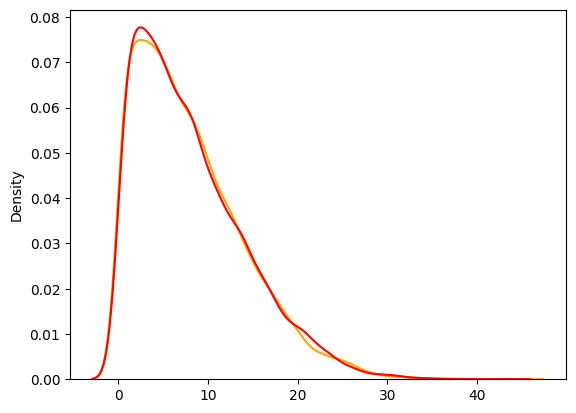

In [8]:
seed = jax.random.PRNGKey(0)

# distribution = dist.HalfNormal(50)
# distribution = dist.StudentT(10000, 10, 2)
# distribution = dist.TruncatedDistribution(dist.StudentT(2.1, 2, 2), low=0)

dist1 = dist.TruncatedNormal(0, 10, low=0)
dist2 = dist.HalfNormal(10)

# dist1 = dist.Gamma(2, 0.1)
# dist2 = dist.Gamma(100, 0.1)

# mixing_distribution = dist.Categorical(probs=jnp.array([0.3, 0.7]))

# component_distributions = [dist1, dist2]

# distribution = MixtureGeneral(
#     mixing_distribution=mixing_distribution,
#     component_distributions=component_distributions
# )

# samples = distribution.sample(seed, sample_shape=(1000,))

samples1 = dist1.sample(seed, sample_shape=(10000,))
samples2 = dist2.sample(seed, sample_shape=(10000,))



# sns.kdeplot(samples, color="green")
sns.kdeplot(samples1, color="orange")
sns.kdeplot(samples2, color="red")



Text(0.5, 1.0, 'Mixture')

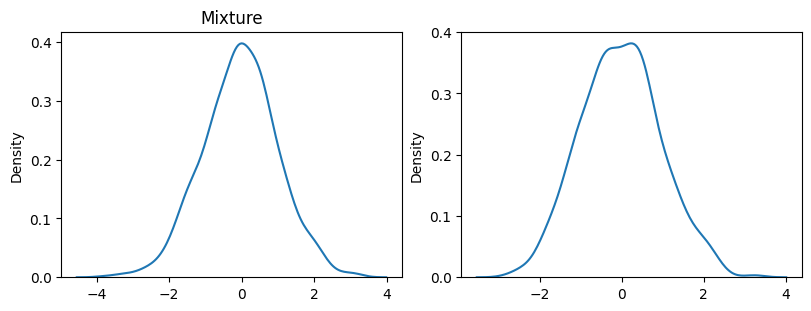

In [4]:
from random import sample
from numpyro.distributions.mixtures import MixtureGeneral



mixing_distribution = dist.Categorical(probs=jnp.array([.8, .2]))

base = dist.Normal(0, 1)
new = dist.Normal(0, 10)

component_distributions = [base, new]

Mixture = MixtureGeneral(
    mixing_distribution=mixing_distribution,
    component_distributions=component_distributions
)

seed = jax.random.PRNGKey(0)

# samples0 = Mixture.sample(seed, sample_shape=(1000,))
samples0 = dist.StudentT(20, 0, 1).sample(seed, sample_shape=(1000,))
samples1 = base.sample(seed, sample_shape=(1000,))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 3), constrained_layout=True)
sns.kdeplot(samples0, ax=ax[0])
sns.kdeplot(samples1, ax=ax[1])
ax[0].set_title("Mixture")

In [5]:
@timing
def simulate(
    random_seed: int = 0,
    n_participant: int = 10,
    n_segment: int = 1,
    n_method: int = 1,
    xMax: int = 15,
    n_points: int = 50
):
    seed = jax.random.PRNGKey(random_seed)

    a_mean = dist.TruncatedDistribution(dist.Normal(3, 5), low=0).sample(seed, sample_shape=(n_participant,))

    a_scale = dist.HalfNormal(10).sample(seed, sample_shape=(n_participant,))
    b_scale = dist.HalfNormal(20).sample(seed, sample_shape=(n_participant,))

    h_scale = dist.HalfNormal(10).sample(seed, sample_shape=(n_participant,))
    v_scale = dist.HalfNormal(50).sample(seed, sample_shape=(n_participant,))

    lo_scale = dist.HalfNormal(.2).sample(seed, sample_shape=(n_participant,))

    noise_offset_scale = dist.HalfCauchy(.05).sample(seed, sample_shape=(n_participant,))
    noise_slope_scale = dist.HalfCauchy(.05).sample(seed, sample_shape=(n_participant,))

    noise_mixture = dist.HalfCauchy(.1).sample(seed, sample_shape=(n_participant,))

    a = dist.TruncatedDistribution(dist.Normal(a_mean, a_scale), low=0).sample(seed, (n_method,)).T
    b = dist.HalfNormal(b_scale).sample(seed, (n_method,)).T

    h = dist.HalfNormal(h_scale).sample(seed, (n_method,)).T
    v = dist.HalfNormal(v_scale).sample(seed, (n_method,)).T

    lo = dist.HalfNormal(lo_scale).sample(seed, (n_method,)).T

    noise_offset = dist.HalfCauchy(noise_offset_scale).sample(seed, (n_method,)).T
    noise_slope = dist.HalfCauchy(noise_slope_scale).sample(seed, (n_method,)).T

    columns = [PARTICIPANT, FEATURES[0], FEATURES[1], INTENSITY, RESPONSE]
    x = jnp.linspace(0, xMax, n_points)
    df = None

    for i in range(n_participant):
        for j in range(n_method):
            participant = jnp.repeat(i, n_points)
            segment = jnp.repeat(0, n_points)
            method = jnp.repeat(j, n_points)

            mean = lo[i, j] + \
                jnp.maximum(
                    0,
                    -1 + \
                    (h[i, j] + 1) / \
                    jnp.power(
                        1 + \
                        (jnp.power(1 + h[i, j], v[i, j]) - 1) * \
                        jnp.exp(-b[i, j] * (x - a[i, j])),
                        1 / v[i, j]
                    )
                )

            sigma = noise_offset[i, j] + noise_slope[i, j] * mean

            """ Mixture """
            mixing_distribution = dist.Categorical(probs=jnp.array([0.95, 0.05]))

            component_distributions = [
                dist.TruncatedNormal(mean, sigma, low=0),
                dist.TruncatedNormal(0, 5, low=0)
            ]

            Mixture = MixtureGeneral(
                mixing_distribution=mixing_distribution,
                component_distributions=component_distributions
            )

            # y = dist.TruncatedNormal(mean, sigma, low=0).sample(seed)
            y = Mixture.sample(seed)

            arr = jnp.array([participant, segment, method, x, y]).T
            temp_df = pd.DataFrame(arr, columns=columns)

            if df is None:
                df = temp_df.copy()
            else:
                df = pd.concat([df, temp_df], ignore_index=True).copy()

    df[PARTICIPANT] = df[PARTICIPANT].astype(int)
    df[FEATURES[0]] = df[FEATURES[0]].astype(int)
    df[FEATURES[1]] = df[FEATURES[0]].astype(int)

    return df, a, a_mean, b, h

In [6]:
df, a, a_mean, b, h = simulate()

plot(df);

In [ ]:
seed = jax.random.PRNGKey(0)
n_participant = 10
n_method = 100000


a_mean = dist.TruncatedDistribution(dist.Normal(5, 10), low=0).sample(seed, sample_shape=(n_participant,))

a_scale = dist.HalfNormal(2).sample(seed, sample_shape=(n_participant,))

a = dist.TruncatedDistribution(dist.Normal(a_mean, a_scale), low=0).sample(seed, (n_method,)).T

In [ ]:
a_mean

Array([ 9.24504639,  1.66679324,  2.68143107,  4.63143244, 15.62832935,
        0.32234815,  2.13375801,  3.60009928,  6.0940919 , 12.55663106],      dtype=float64)

In [ ]:
a

Array([[21.73779742],
       [ 2.3033415 ],
       [ 2.86131006],
       [ 4.6212654 ],
       [76.3373841 ],
       [ 0.71981767],
       [ 2.60957954],
       [ 3.24640852],
       [ 7.31910629],
       [45.9738296 ]], dtype=float64)

<Axes: ylabel='Density'>

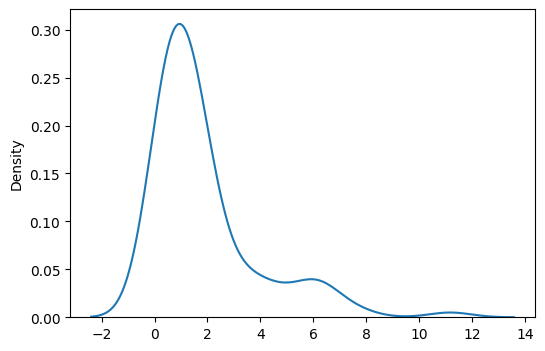

In [ ]:
a = .7

mixing_distribution = dist.Categorical(probs=jnp.array([a, 1 - a]))

component_distributions = [
    dist.TruncatedNormal(0, 1, low=0),
    dist.TruncatedNormal(0, 4, low=0)
]

Mixture = MixtureGeneral(
    mixing_distribution=mixing_distribution,
    component_distributions=component_distributions
)

rng_key = random.PRNGKey(0)

samples = Mixture.sample(rng_key, sample_shape=(100,))
# samples = dist.TruncatedNormal(0, 1, low=0).sample(rng_key, sample_shape=(100,))

plt.figure(figsize=(6, 4))
sns.kdeplot(samples)


In [ ]:
J = 8

y = np.array([28.0, 8.0, -3.0, 7.0, -1.0, 1.0, 18.0, 12.0])

sigma = np.array([15.0, 10.0, 16.0, 11.0, 9.0, 11.0, 10.0, 18.0])

In [ ]:
def eight_schools(J, sigma, y=None):

    mu = numpyro.sample('mu', dist.Normal(0, 5))

    tau = numpyro.sample('tau', dist.HalfCauchy(5))

    with numpyro.plate('J', J):

        theta = numpyro.sample('theta', dist.Normal(mu, tau))

        numpyro.sample('obs', dist.Normal(theta, sigma), obs=y)

In [ ]:
from jax import random

from numpyro.infer import MCMC, NUTS



nuts_kernel = NUTS(eight_schools)

mcmc = MCMC(nuts_kernel, num_warmup=500, num_samples=1000)


mcmc.run(rng_key, J, sigma, y=y, extra_fields=('potential_energy',))

2023-05-31 09:11:55,275 - jax._src.xla_bridge - INFO - Unable to initialize backend 'tpu_driver': NOT_FOUND: Unable to find driver in registry given worker: 
2023-05-31 09:11:55,276 - jax._src.xla_bridge - INFO - Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023-05-31 09:11:55,276 - jax._src.xla_bridge - INFO - Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023-05-31 09:11:55,277 - jax._src.xla_bridge - INFO - Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.
2023-05-31 09:11:55,277 - jax._src.xla_bridge - INFO - Unable to initialize backend 'plugin': xla_extension has no attributes named get_plugin_device_client. Compile TensorFlow with //tensorflow/compiler/xla/python:enable_plugin_device set to true (defaults to false) to enable this.
sample: 100%|██████████| 1500/1500 [00:01<00:00, 1091.71it/s, 7 steps of size 2.51e-01. acc. prob=0